# Zonal Mean Temperature

Calculating the zonal mean of a quantity

In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt

In [2]:
from joblib import Memory

memory = Memory(cachedir='/g/data1/v45/cosima-cookbook/', verbose=0)

In [3]:
cc.start_cluster(diagnostics_port=8787)

If the link to the dashboard below doesn't work, run this command on a local terminal to set up a SSH tunnel:

  ssh -N -L 8787:127.0.0.1:8787 vdi-n11.nci.org.au -l jm0634


Client Scheduler: tcp://127.0.0.1:44730 Dashboard: http://127.0.0.1:8787,Cluster Workers: 4 Cores: 8 Memory: 24.00 GB


In [5]:
expts = cc.get_experiments('mom01v5')[:4]
expts

['GFDL50', 'KDS75', 'KDS75_PI', 'KDS75_UP']

Zonal mean allow us to look at the ocean in cross-section. In this diagnostics, we calculate the time averaged, zonal mean temperature field.

In [6]:
@memory.cache
def calc_zonal_mean_temp(expt, n=1):
    print('Calculating {} zonal_mean_temp'.format(expt))
    
    if expt == 'mom01v5/KDS75':
        ncfile = 'ocean_month.nc'
    else:
        ncfile = 'ocean.nc'
        
    zonal_temp = cc.get_nc_variable(expt, ncfile, 'temp',
                                 chunks={'st_ocean': None},
                                 n=n)
    
    zonal_mean_temp = zonal_temp.mean('xt_ocean').mean('time')
    
    zonal_mean_temp.load()
    
    return zonal_mean_temp

In this example, we assume that the cells are all of the same thickness in the $x$ direction. It would be accurate to perform a weighted average using the `dzt` field.

In [7]:
def plot_zonal_mean_temp(zonal_mean_temp):
    zonal_mean_temp.plot()
    plt.gca().invert_yaxis()
    plt.title('{}: Zonal Mean Temp'.format(expt))

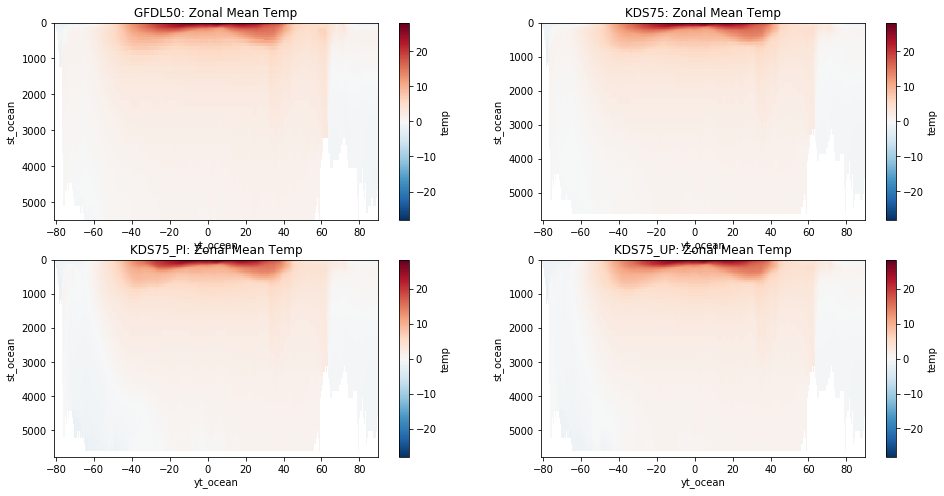

In [12]:
plt.figure(figsize=(16,8))
for n, expt in enumerate(expts): 
    plt.subplot(2,2,n+1)
    zonal_mean_temp = calc_zonal_mean_temp(expt)
    plot_zonal_mean_temp(zonal_mean_temp)